# Predicting Recovered and Deaths Ratio On Covid Data

In this CRISP-DM Exercise, I will do an analysis on Covid-19 Data that i retrivied from [Kaggle.com](Kaggle.com). The data set we will be working with contains data from another country. For each country we have information about "Confirmed" person, "Suspected" person, "Death" person, and "Recovered" person.

## Business Understanding
The CRISP-DM process starts with the understanding of the Covid problem. Based on its attributes. In this project we try to answer to the following 3 Covid questions:

<br> * Is the death directly proportional to the confirmed person?
<br> * Are the recovered aspect influenced by the time?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv(r'https://raw.githubusercontent.com/AuChrist/CRISP-DM/main/datasets/2019_nC0v_20200121_20200126%20-%20SUMMARY.csv')
data

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
363,NaN,France,1/26/2020 11:00 AM,3.0,NaN,NaN,NaN
364,NaN,Australia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN
365,NaN,Nepal,1/26/2020 11:00 AM,1.0,NaN,NaN,NaN
366,NaN,Malaysia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN


In [7]:
data.head()

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Province/State     304 non-null    object 
 1   Country            368 non-null    object 
 2   Date last updated  368 non-null    object 
 3   Confirmed          339 non-null    float64
 4   Suspected          88 non-null     float64
 5   Recovered          36 non-null     float64
 6   Deaths             24 non-null     float64
dtypes: float64(4), object(3)
memory usage: 20.2+ KB


In [9]:
data["Province/State"].mode()
data["Country"].mode()
data["Date last updated"].mode()
data["Confirmed"].mode()
data["Suspected"].mode()
data["Recovered"].mode()
data["Deaths"].mode()

0    1.0
dtype: float64

In [10]:
data.describe()

,Confirmed,Suspected,Recovered,Deaths
count,339.000000,88.000000,36.000000,24.000000
mean,30.351032,22.613636,7.722222,11.041667
std,112.556169,48.177696,13.306521,17.521364
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,5.000000,4.000000,1.500000,1.000000
75%,18.000000,22.000000,2.000000,18.750000
max,1058.000000,244.000000,42.000000,52.000000


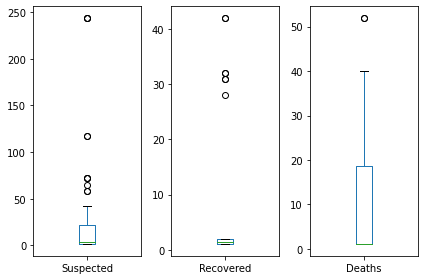

In [11]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
data['Suspected'].plot.box(ax=ax1)
data['Recovered'].plot.box(ax=ax2)
data['Deaths'].plot.box(ax=ax3)
fig.tight_layout()

In [12]:
data.isna().sum()

Province/State        64
Country                0
Date last updated      0
Confirmed             29
Suspected            280
Recovered            332
Deaths               344
dtype: int64

In [13]:
data["Suspected"]=data["Suspected"].fillna(data["Suspected"].median())
data["Recovered"]=data["Recovered"].fillna(data["Recovered"].median())
data["Deaths"]=data["Deaths"].fillna(data["Deaths"].median())
data["Confirmed"]=data["Confirmed"].fillna(data["Confirmed"].mode()[0])
data["Province/State"]=data["Province/State"].fillna(data["Province/State"].mode()[0])

In [14]:
data.isna().sum()

Province/State       0
Country              0
Date last updated    0
Confirmed            0
Suspected            0
Recovered            0
Deaths               0
dtype: int64

In [15]:
obj_cols= [*data.select_dtypes('object').columns]
obj_cols.remove('Province/State')

In [16]:
num_cols= [*data.select_dtypes(['Int64', 'Float64']).columns]
num_cols

['Confirmed', 'Suspected', 'Recovered', 'Deaths']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


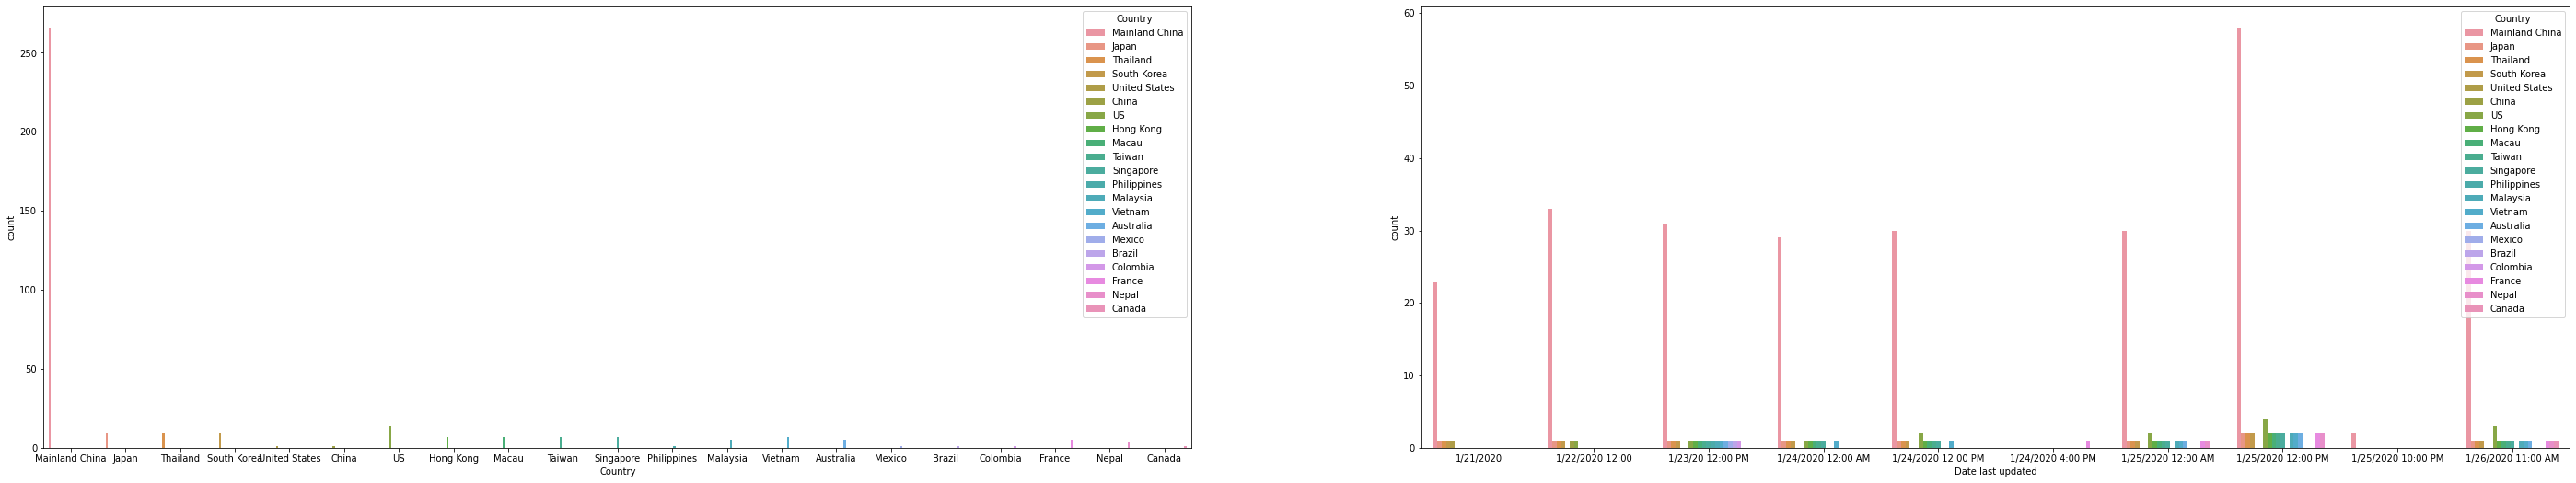

In [17]:
plt.figure(figsize=(76, 30))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3,3 , idx+1)
    
    sns.countplot(cols, data= data, hue='Country')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


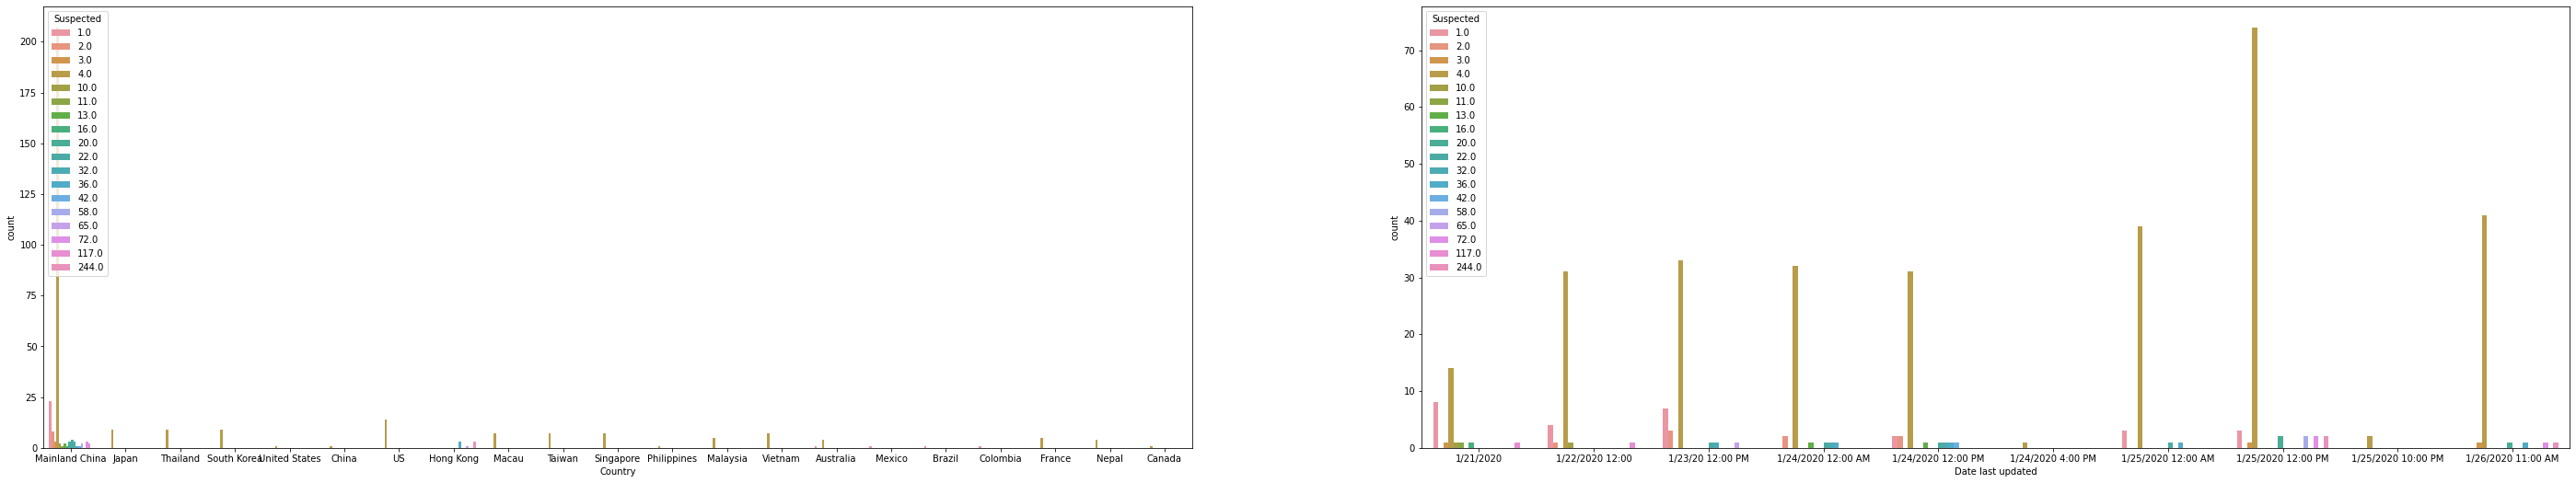

In [18]:
plt.figure(figsize=(76, 30))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3,3 , idx+1)
    
    sns.countplot(cols, data= data, hue='Suspected')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


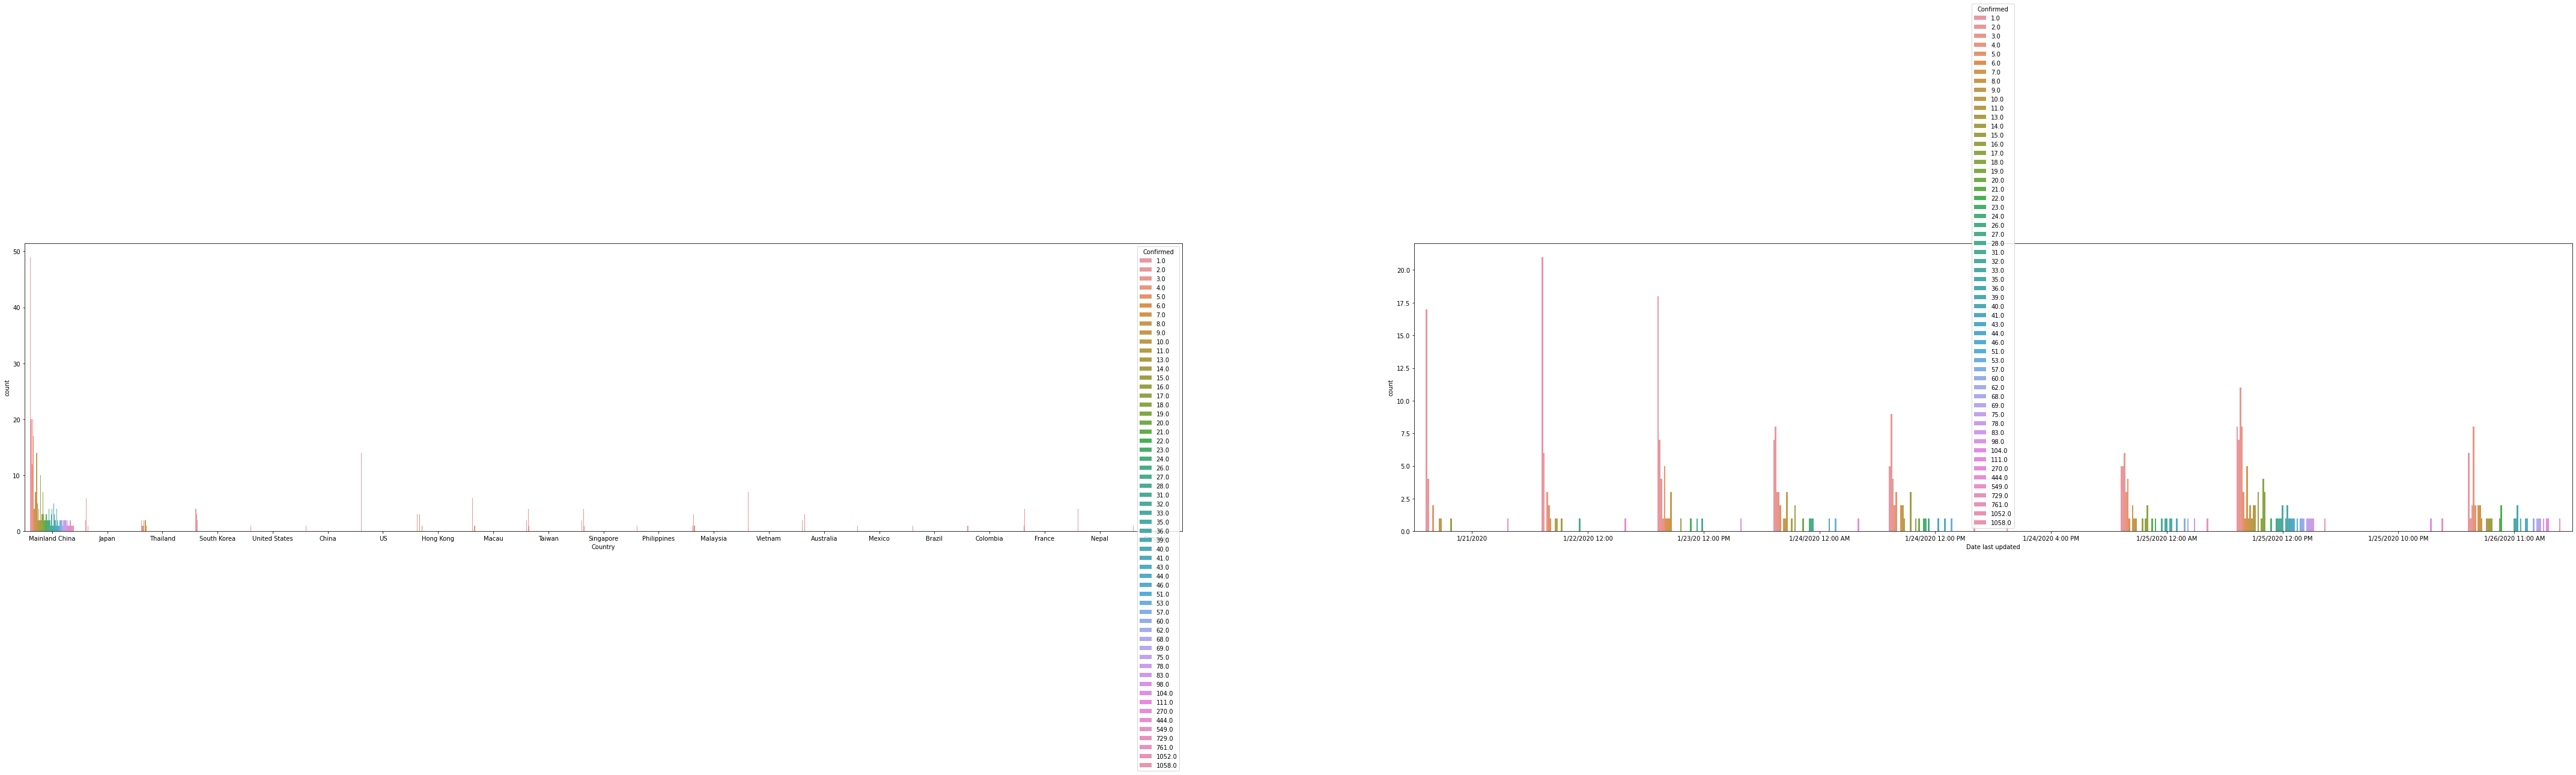

In [19]:
plt.figure(figsize=(76, 30))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3,2 , idx+1)
    
    sns.countplot(cols, data= data, hue='Confirmed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


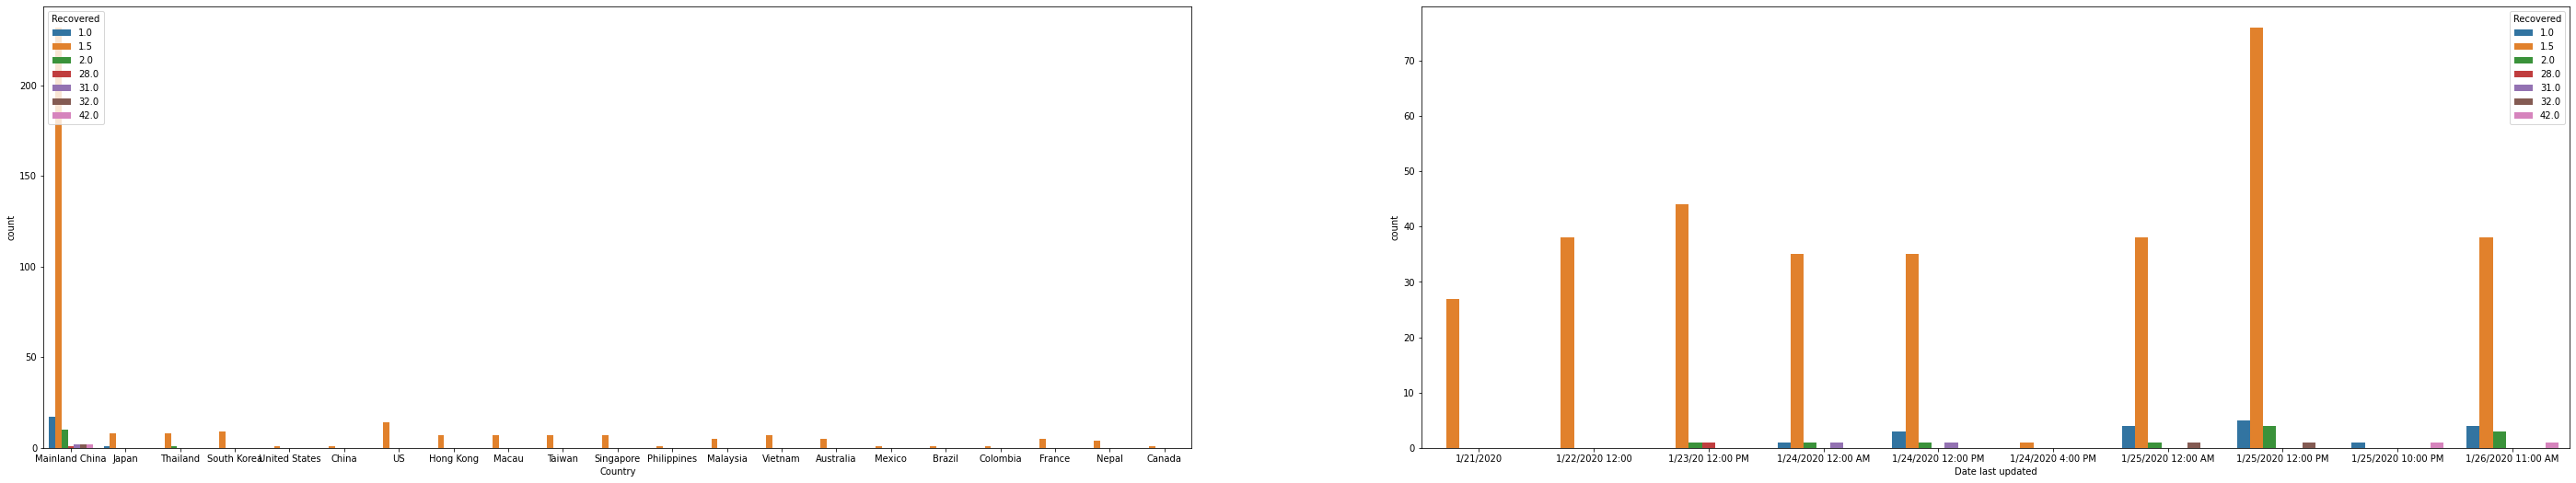

In [20]:
plt.figure(figsize=(76, 30))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3,3 , idx+1)
    
    sns.countplot(cols, data= data, hue='Recovered')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


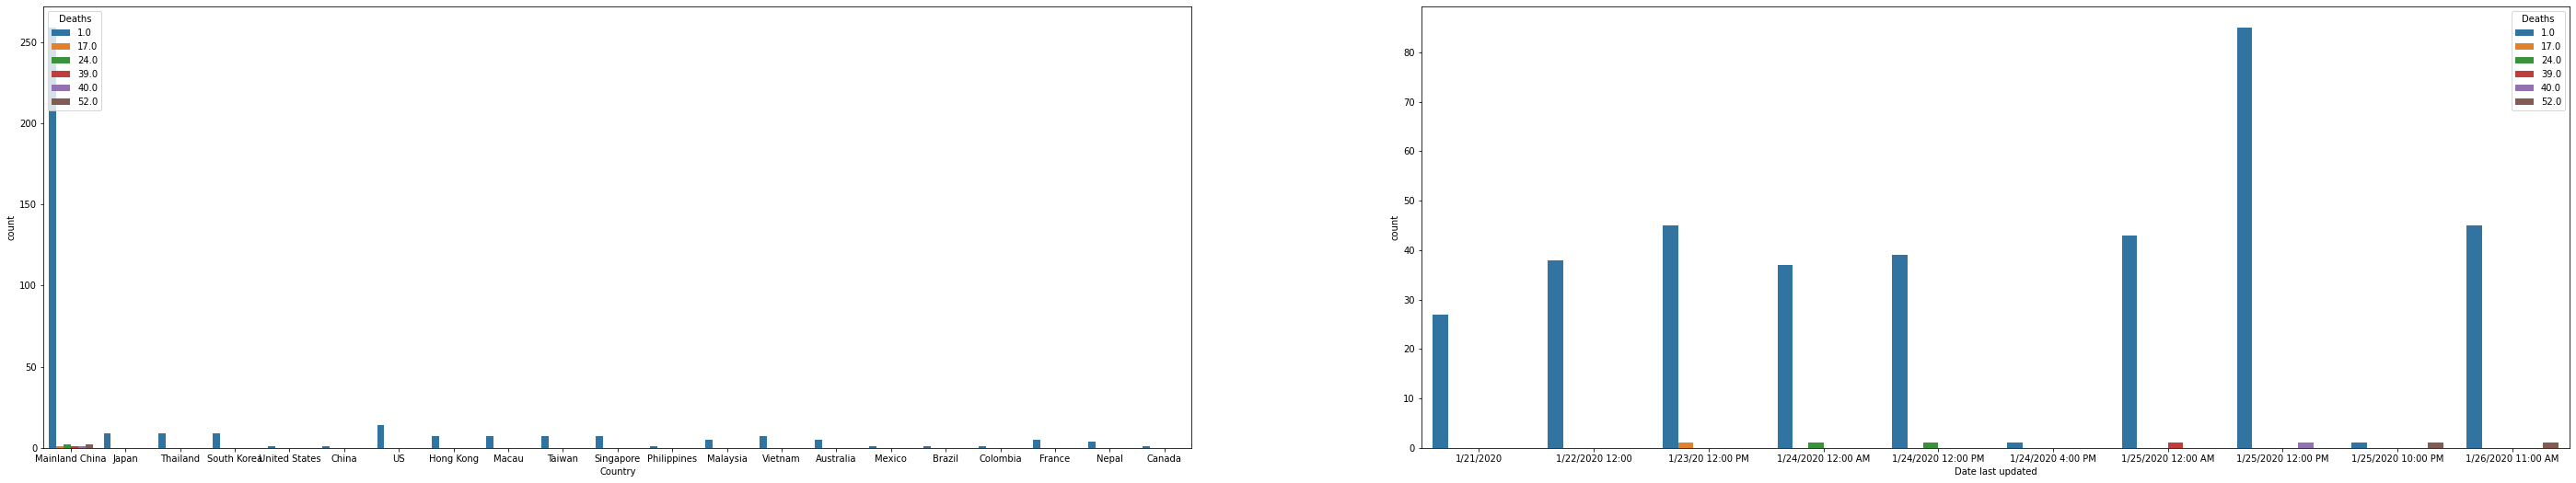

In [21]:
plt.figure(figsize=(76, 30))

for idx, cols in enumerate(obj_cols):
    
    plt.subplot(3,3 , idx+1)
    
    sns.countplot(cols, data= data, hue='Deaths')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


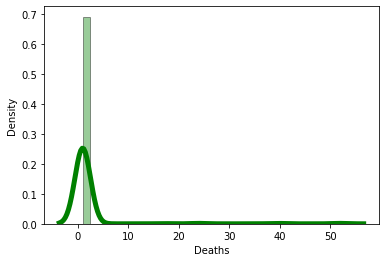

In [22]:
sns.distplot(data['Deaths'], hist=True, kde=True, bins=int(180/5),color = 'green', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':5})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


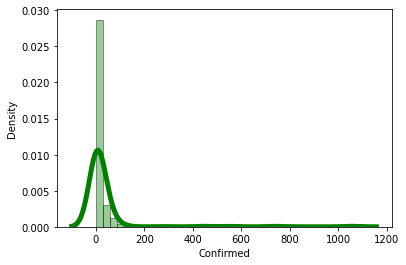

In [23]:
sns.distplot(data['Confirmed'], hist=True, kde=True, bins=int(180/5),color = 'green', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':5})

In [24]:
X = np.array(data)
print(X)

[['Shanghai' 'Mainland China' '1/21/2020' ... 10.0 1.5 1.0]
 ['Yunnan' 'Mainland China' '1/21/2020' ... 4.0 1.5 1.0]
 ['Beijing' 'Mainland China' '1/21/2020' ... 4.0 1.5 1.0]
 ...
 ['Anhui' 'Nepal' '1/26/2020 11:00 AM' ... 4.0 1.5 1.0]
 ['Anhui' 'Malaysia' '1/26/2020 11:00 AM' ... 4.0 1.5 1.0]
 ['Ontario' 'Canada' '1/26/2020 11:00 AM' ... 4.0 1.5 1.0]]
